## Treinando uma Rede Neural Convolucional usando o Keras

- Arquitetura simples com duas camadas convolucionais
- Utilizando um conjunto de imagens de células cervicais

## Base de imagens de células cervicais
#### Células anormais
![alt text](abnormal.jpg "Abnormal Cell")

#### Células normais
![alt text](normal.jpg "Normal Cell")


# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from skimage.io import imread
from skimage.transform import resize

# Ler dados

In [2]:
database_classes = glob('database/*/')
n_classes = len(database_classes)
n_files = glob('database/*/*.tif')

labels = np.zeros((len(n_files),n_classes))
images = np.zeros((len(n_files),100,100,3))

cont = 0
lb = 0
for classes in database_classes:
    files_in_classe = glob(classes+'*.tif')
    for fc in files_in_classe:
        labels[cont,lb] = 1
        im = imread(fc)
        image_resized = resize(im, (100,100,3))
        images[cont,:,:,:] = image_resized
        cont+=1
    lb +=1

In [3]:
images.shape

(198, 100, 100, 3)

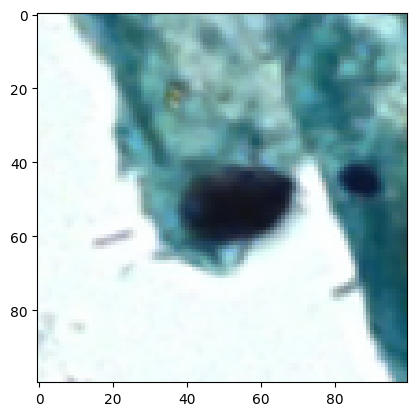

In [4]:
plt.imshow(images[191,:,:,:])

# Dividindo dados em Treino e Teste

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3)

In [6]:
print('Tamanho do Treino: ', X_train.shape)
print('Tamanho do Teste: ', X_test.shape)

Tamanho do Treino:  (138, 100, 100, 3)
Tamanho do Teste:  (60, 100, 100, 3)


# Construindo a CNN

In [7]:
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard
from time import time

Using TensorFlow backend.


In [8]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3),name='layer_conv1'))
model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool1'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',name='layer_conv2'))
model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool2'))

#model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',name='layer_conv3'))
#model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool3'))


model.add(layers.Flatten(name='layer_flatten'))

model.add(layers.Dropout(rate=0.75,name='layer_drop'))

model.add(layers.Dense(units=256, activation='relu',name='layer_fc1'))

model.add(layers.Dense(units=128, activation='relu',name='layer_fc2'))

model.add(layers.Dense(units=2, activation = 'softmax',name='layer_softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_conv1 (Conv2D)         (None, 98, 98, 64)        1792      
_________________________________________________________________
layer_pool1 (MaxPooling2D)   (None, 49, 49, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 47, 47, 64)        36928     
_________________________________________________________________
layer_pool2 (MaxPooling2D)   (None, 23, 23, 64)        0         
_________________________________________________________________
layer_flatten (Flatten)      (None, 33856)             0         
_________________________________________________________________
layer_drop (Dropout)         (None, 33856)             0         
_________________________________________________________________
layer_fc1 (Dense)            (None, 256)              

In [10]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(0.0001), metrics=['accuracy'])

In [11]:
EPOCHS = 5
BATCH_SIZE = 64

In [12]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.2)
train_generator = ImageDataGenerator().flow(X_train, Y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, Y_validation, batch_size=BATCH_SIZE)

In [13]:
steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.7077 - accuracy: 0.5156 - val_loss: 0.7187 - val_accuracy: 0.4643
Epoch 2/5
1/1 [==============================] - 1s 1s/step - loss: 0.7682 - accuracy: 0.4565 - val_loss: 0.7180 - val_accuracy: 0.4643
Epoch 3/5
1/1 [==============================] - 4s 4s/step - loss: 0.7086 - accuracy: 0.5156 - val_loss: 0.7176 - val_accuracy: 0.4643
Epoch 4/5
1/1 [==============================] - 2s 2s/step - loss: 0.7444 - accuracy: 0.3696 - val_loss: 0.7170 - val_accuracy: 0.4643
Epoch 5/5
1/1 [==============================] - 2s 2s/step - loss: 0.7225 - accuracy: 0.4783 - val_loss: 0.7164 - val_accuracy: 0.4643


In [14]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

60/60 [==============================] - 1s 9ms/step
Test loss: 0.7194727579752604
Test accuracy: 0.5


# Atividades

### Pesquisar o uso de redes pré-treinadas no Keras
### Pesquisar o uso de fine-tuning no Keras
### Pesquisar o uso da rede U-Net no Keras

## Enviar um notebook com exemplo de utilização dessas 3 técnicas até 14/03/2023.